In [46]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('../data/raw/mushrooms.csv')
y = df['class']
df = df.drop(columns=['class', 'veil-type'])
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,s,w,w,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,s,w,w,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,s,w,w,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,s,w,w,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,s,w,w,w,o,e,n,a,g


In [9]:
dum = pd.get_dummies(df)
dum.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [38]:
pca = PCA(n_components=.99)
trans = pca.fit_transform(dum)

(array([1514., 1291., 1081.,  955.,  131.,  562.,  895.,  549.,  837.,
         309.]),
 array([-1.91984178e+00, -1.44052092e+00, -9.61200050e-01, -4.81879185e-01,
        -2.55831858e-03,  4.76762547e-01,  9.56083413e-01,  1.43540428e+00,
         1.91472515e+00,  2.39404601e+00,  2.87336688e+00]),
 <a list of 10 Patch objects>)

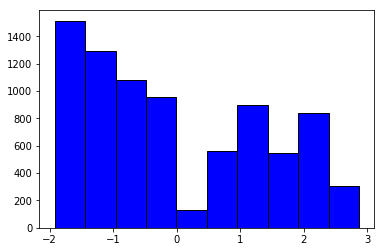

In [47]:
plt.hist(trans[:,0], color = 'blue', edgecolor = 'black')

In [58]:
trans

array([[-0.99624519],
       [-1.44173282],
       [-1.52408477],
       ...,
       [-0.28781672],
       [ 1.93043302],
       [-0.24929719]])

In [68]:
trans_with_y = pd.concat([y,pd.Series(trans[:,0])], axis=1)

In [70]:
e = trans_with_y[trans_with_y['class'] == 'e']
p = trans_with_y[trans_with_y['class'] == 'p']

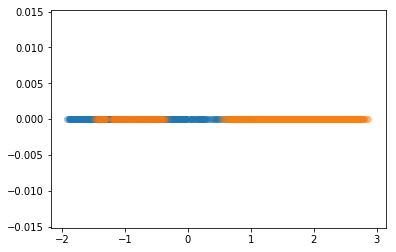

In [78]:
plt.scatter(x=e[0],y=np.zeros(len(e)), alpha=0.1)
plt.scatter(x=p[0],y=np.zeros(len(p)), alpha=0.1)